# Lecture 11 状態空間モデル

岩政追加その２

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import io
import requests
import statsmodels.api as sm

In [27]:

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
df = pd.read_csv(io.StringIO(stream.decode('utf-8')),
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
df.head()

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

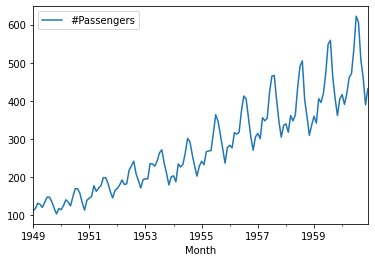

In [28]:
df.plot()

In [29]:
df.columns

Index(['#Passengers'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
x = list(df.index)
y = df["Passengers"]
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 1)

KeyError: 'Passengers'

In [23]:
x_train,y_train

([29,
  58,
  138,
  31,
  65,
  45,
  19,
  77,
  83,
  119,
  90,
  123,
  44,
  28,
  35,
  100,
  111,
  40,
  17,
  66,
  73,
  104,
  93,
  18,
  4,
  131,
  39,
  36,
  109,
  139,
  99,
  54,
  51,
  98,
  117,
  114,
  11,
  78,
  95,
  12,
  2,
  59,
  126,
  142,
  6,
  113,
  122,
  56,
  118,
  102,
  55,
  110,
  75,
  46,
  62,
  85,
  92,
  116,
  10,
  34,
  32,
  115,
  38,
  103,
  143,
  27,
  23,
  67,
  125,
  121,
  89,
  97,
  124,
  87,
  135,
  132,
  64,
  15,
  82,
  41,
  80,
  52,
  26,
  76,
  43,
  24,
  130,
  107,
  120,
  49,
  21,
  70,
  3,
  136,
  30,
  141,
  106,
  47,
  127,
  88,
  8,
  81,
  60,
  0,
  1,
  57,
  22,
  61,
  63,
  7,
  9,
  105,
  13,
  86,
  96,
  68,
  50,
  101,
  20,
  25,
  134,
  71,
  129,
  79,
  133,
  137,
  72,
  140,
  37],
 29     178
 58     180
 138    622
 31     199
 65     264
       ... 
 133    391
 137    535
 72     242
 140    508
 37     180
 Name: Passengers, Length: 129, dtype: int64)

c:\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 4.902462
         Iterations: 8
         Function evaluations: 24
         Gradient evaluations: 24


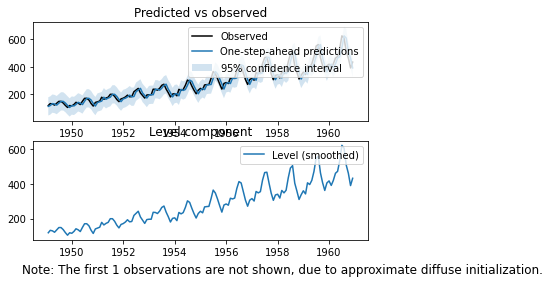

In [32]:
#train_data = pd.concat([x_train, y_train], axis = 1)

# local level model
local_level_model = sm.tsa.UnobservedComponents(df, 'llevel')
# parameter estimation with maximum likelihood estimation
local_level_params = local_level_model.fit(
                        method='bfgs', 
                        maxiter=500)
# plot summary
fig = local_level_params.plot_components()

In [33]:
st = pd.to_datetime(test_data.index[0])
ed = pd.to_datetime(test_data.index[-1])
# forecast future values
statespace_pred = seasonal_params.predict(st, ed)
# plot results
ax1 = train_data.plot(figsize=(16,4))
test_data.plot(color="0.7",
          linestyle='dotted',
          linewidth="5.0",
          ax=ax1)
sarima_pred.plot(ax=ax1)
statespace_pred.plot(ax=ax1)
plt.legend(['train', 'original', 'SARIMA', 'State Space'])
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.show()

NameError: name 'test_data' is not defined